# CSC420 Assignment 4 Implementation Task

In [64]:
import math

import numpy as np
import matplotlib.pyplot as plt
import cv2
from shapely.geometry import box, Polygon

In [ ]:
# cap = cv2.VideoCapture(0) # camera feed
cap = cv2.VideoCapture("Q5/KylianMbappe.mp4") # video

# capture one frame
ret,frame = cap.read()

# detect a face on the first frame
face_detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
face_boxes = face_detector.detectMultiScale(frame)


if len(face_boxes)==0:
    print('no face detected')
    assert(False)

# initialize the tracing window around the (first) detected face
(x,y,w,h) = tuple(face_boxes[1])
track_window = (x,y,w,h)

#  region of interest for tracking
roi = frame[y:y+h, x:x+w]

# convert the roi to HSV so we can construct a histogram of Hue
hsv_roi =  cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

# why do we need this mask? (remember the cone?)
# read the description for Figure 3 in the original Cam Shift paper: http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.14.7673
# mask = cv2.inRange(hsv_roi, np.array((0., 60.,32.)), np.array((180.,255.,255.)))


# form histogram of hue in the roi
# roi_hist = cv2.calcHist([hsv_roi],[0],mask,[180],[0,180])
mask = cv2.inRange(hsv_roi, np.array((0., 60.,32.)), np.array((180.,255.,255.)))
roi_hist = cv2.calcHist([hsv_roi],[0],mask,[180],[0,180])

# normalize the histogram array values so they are in the min=0 to max=255 range
cv2.normalize(roi_hist,roi_hist,0,255,cv2.NORM_MINMAX)

# termination criteria for mean shift: 10 iteration or shift less than 1 pixel
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 )

In [ ]:
#plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))

In [ ]:
plt.hist(roi_hist)

In [194]:
cap = cv2.VideoCapture("Q5/KylianMbappe.mp4") # video

# capture one frame
ret,frame = cap.read()

# detect a face on the first frame
face_detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
face_boxes = face_detector.detectMultiScale(frame)

if len(face_boxes)==0:
    print('no face detected')
    assert(False)

# initialize the tracing window around the (first) detected face
(x,y,w,h) = tuple(face_boxes[1])
track_window = (x,y,w,h)

#  region of interest for tracking
roi = frame[y:y+h, x:x+w]

# convert the roi to HSV so we can construct a histogram of Hue
hsv_roi =  cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

# why do we need this mask? (remember the cone?)
# read the description for Figure 3 in the original Cam Shift paper: http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.14.7673
mask = cv2.inRange(hsv_roi, np.array((0., 60.,32.)), np.array((180.,255.,255.)))


# form histogram of hue in the roi
roi_hist = cv2.calcHist([hsv_roi],[0],mask,[180],[0,180])

# normalize the histogram array values so they are in the min=0 to max=255 range
cv2.normalize(roi_hist,roi_hist,0,255,cv2.NORM_MINMAX)

# termination criteria for mean shift: 10 iteration or shift less than 1 pixel
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 )

IOUs = []

while True:

    # grab a frame
    ret ,frame = cap.read()

    if ret == True:

        # convert to HSV
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

        # histogram back projection using roi_hist
        dst = cv2.calcBackProject([hsv],[0],roi_hist,[0,180],1)

        # use meanshift to shift the tracking window
        ret, track_window = cv2.meanShift(dst, track_window, term_crit)

        # display tracked window
        x,y,w,h = track_window
        img = cv2.rectangle(frame, (x,y), (x+w,y+h), (0,0,255),5)

        # apply camshift to get the new location
        ret2, track_window2 = cv2.CamShift(dst, track_window, term_crit)
        # Draw it on image
        pts = cv2.boxPoints(ret2)
        pts = np.int0(pts)
        img2 = cv2.polylines(img,[pts],True, 255,2)
        cv2.imshow('cam shift tracking demo',img2)


        truth_bound = [[x, y], [x+w, y], [x+w, y+h], [x, y+h]]
        track_bound = np.array(pts).tolist()
        # polygon1_shape = Polygon(track_bound)
        polygon1_shape = Polygon(truth_bound)
        polygon2_shape = Polygon(track_bound)
        # print(polygon1_shape)
        # print(polygon2_shape)
        polygon_intersection = polygon1_shape.intersection(polygon2_shape).area
        polygon_union = polygon1_shape.union(polygon2_shape).area
        IOU = polygon_intersection / polygon_union
        IOUs.append(IOU)


        if cv2.waitKey(33) & 0xFF == 27: # wait a bit and exit is ESC is pressed
            break

    else:
        break

cv2.destroyAllWindows()
cap.release()

(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720, 1280)
(720

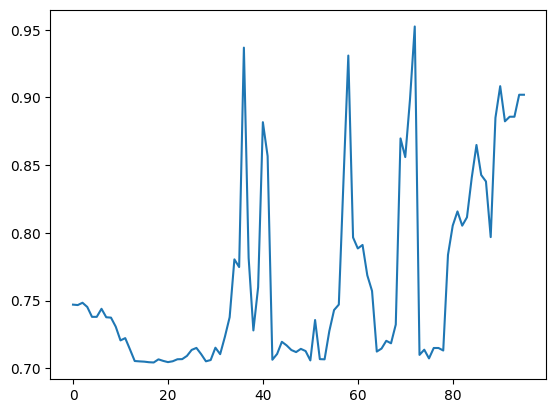

In [42]:
plt.plot(list(range(len(IOUs))), IOUs)
plt.savefig('Q5_prod/IOU.jpg')
plt.show()

In [139]:
def get_gradient_direction(image):
    blurred = cv2.GaussianBlur(image,(7,7),10)
    sobelx = np.array(cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3))
    sobely = np.array(cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3))
    _, angle = cv2.cartToPolar(sobelx, sobely, angleInDegrees=True)
    return angle, sobelx, sobely
    """
    # gradient_dir = sobelx / sobely
    gradient_dir = np.arctan(gradient_dir) * 360 / math.pi + 180
    return np.nan_to_num(gradient_dir, nan=0)
    """

In [190]:
cap = cv2.VideoCapture("Q5/KylianMbappe.mp4") # video

# capture one frame
ret,frame = cap.read()

# detect a face on the first frame
face_detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
face_boxes = face_detector.detectMultiScale(frame)

if len(face_boxes)==0:
    print('no face detected')
    assert(False)

# initialize the tracing window around the (first) detected face
(x,y,w,h) = tuple(face_boxes[1])
track_window = (x,y,w,h)

#  region of interest for tracking
roi = frame[y:y+h, x:x+w]

# convert the roi to HSV so we can construct a histogram of Hue
roi_gray =  cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

gradient_dir = get_gradient_direction(roi_gray)

lower_red =  np.array((20.))
upper_red =  np.array((340.))
mask = cv2.inRange(roi_gray, lower_red, upper_red)
# form histogram of hue in the roi
roi_hist = cv2.calcHist([roi_gray],[0],mask,[24],[0,360])

# plt.hist(roi_hist)

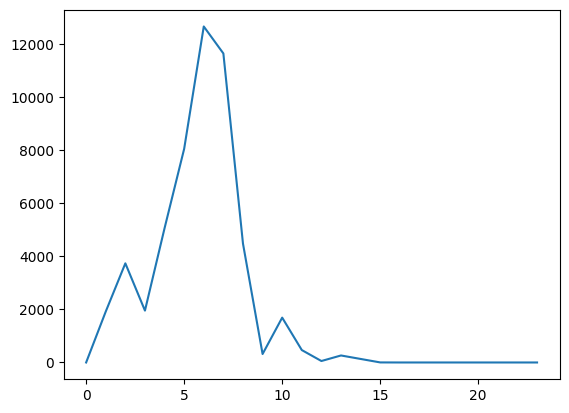

In [188]:
# plt.imshow(gradient_dir)
plt.plot(roi_hist)

In [196]:
cap = cv2.VideoCapture("Q5/KylianMbappe.mp4") # video

# capture one frame
ret,frame = cap.read()

# detect a face on the first frame
face_detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
face_boxes = face_detector.detectMultiScale(frame)

if len(face_boxes)==0:
    print('no face detected')
    assert(False)

# initialize the tracing window around the (first) detected face
(x,y,w,h) = tuple(face_boxes[1])
track_window = (x,y,w,h)

#  region of interest for tracking
roi = frame[y:y+h, x:x+w]

# convert the roi to HSV so we can construct a histogram of Hue
roi_gray =  cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

gradient_dir, gx, gy = get_gradient_direction(roi_gray)

ggg = np.array([gradient_dir, gx, gy]).transpose(1, 2, 0)

ggg = np.clip(ggg, a_min=0, a_max=255)

lower_red =  np.array((10., 10., 10.))
upper_red =  np.array((180., 180., 180.))
mask = cv2.inRange(ggg, lower_red, upper_red)
# form histogram of hue in the roi
roi_hist = cv2.calcHist([roi_gray],[0],mask,[24],[0,360])

# normalize the histogram array values so they are in the min=0 to max=255 range
cv2.normalize(roi_hist,roi_hist,0,255,cv2.NORM_MINMAX)

# termination criteria for mean shift: 10 iteration or shift less than 1 pixel
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 )

IOUs = []

while True:

    # grab a frame
    ret ,frame = cap.read()

    if ret == True:

        # convert to HSV
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        gradient_dir, gx, gy = get_gradient_direction(roi_gray)

        ggg = np.array([gradient_dir, gx, gy]).transpose(1, 2, 0).astype(int) / 2


        # histogram back projection using roi_hist
        dst = cv2.calcBackProject([ggg], [0], roi_hist, [0,360], 1)

        # use meanshift to shift the tracking window
        ret, track_window = cv2.meanShift(dst, track_window, term_crit)

        # display tracked window
        x,y,w,h = track_window
        img = cv2.rectangle(frame, (x,y), (x+w,y+h), (0,0,255), 5)

        # apply camshift to get the new location
        ret2, track_window2 = cv2.CamShift(dst, track_window, term_crit)
        # Draw it on image
        pts = cv2.boxPoints(ret2)
        pts = np.int0(pts)
        img2 = cv2.polylines(img,[pts],True, 255,2)
        cv2.imshow('cam shift tracking demo',img2)


        truth_bound = [[x, y], [x+w, y], [x+w, y+h], [x, y+h]]
        track_bound = np.array(pts).tolist()
        # polygon1_shape = Polygon(track_bound)
        polygon1_shape = Polygon(truth_bound)
        polygon2_shape = Polygon(track_bound)
        # print(polygon1_shape)
        # print(polygon2_shape)
        polygon_intersection = polygon1_shape.intersection(polygon2_shape).area
        polygon_union = polygon1_shape.union(polygon2_shape).area
        IOU = polygon_intersection / polygon_union
        IOUs.append(IOU)


        if cv2.waitKey(33) & 0xFF == 27: # wait a bit and exit is ESC is pressed
            break

    else:
        break

cv2.destroyAllWindows()
cap.release()

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\histogram.cpp:1640: error: (-210:Unsupported format or combination of formats)  in function 'cv::calcBackProject'
